In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pylab import rcParams
import numpy as np
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from sklearn.preprocessing import MinMaxScaler

In [2]:
start = datetime.datetime(2010, 8, 1)
end = datetime.datetime(2020, 7, 31)
tickers =  ['BTC-USD', 'CL=F', 'EURUSD=X', 'GC=F', 'TSLA']

In [3]:
df = web.DataReader("BTC-USD", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


In [4]:
df.reset_index(inplace=True)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
1,2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2,2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
3,2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
4,2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


# Moving Average

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [6]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')

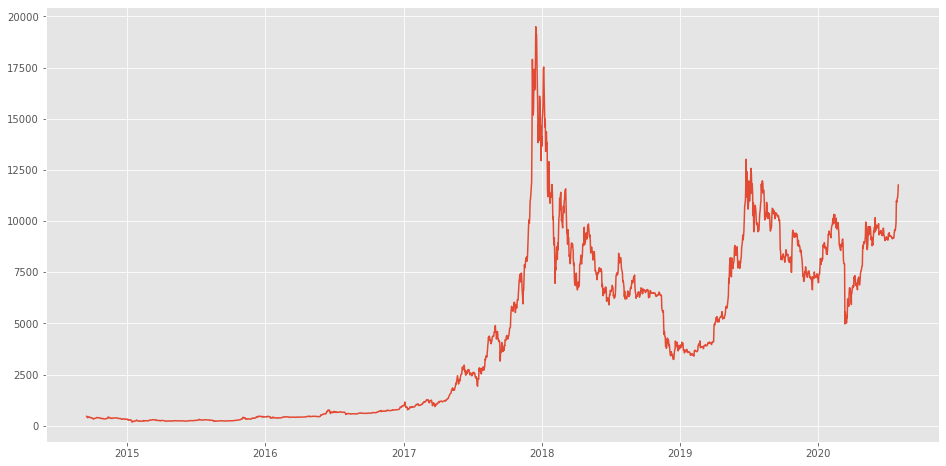

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Adj Close'], label='Close Price history')

In [8]:
df.index = df['Date']

In [9]:
# Creating dataframe with date and the target variable

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Adj Close'])

for i in range(0, len(data)):
  new_data['Date'][i] = data['Date'][i]
  new_data['Adj Close'][i] = data['Adj Close'][i]

In [10]:
new_data.shape

(2146, 2)

In [11]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, random_state=1)

In [12]:
# Train-test split
train = new_data[:1600]
test = new_data[1600:]

In [13]:
new_data.shape, train.shape, test.shape

((2146, 2), (1600, 2), (546, 2))

In [14]:
num = test.shape[0]

In [15]:
train['Date'].min(), train['Date'].max(), test['Date'].min(), test['Date'].max()

(Timestamp('2014-09-16 00:00:00'),
 Timestamp('2019-02-02 00:00:00'),
 Timestamp('2019-02-03 00:00:00'),
 Timestamp('2020-07-31 00:00:00'))

In [16]:
# Making predictions

preds = []
for i in range(0, num):
  a = train['Adj Close'][len(train)-646+i:].sum() + sum(preds)
  b = a/num
  preds.append(b)

In [17]:
len(preds)

546

In [18]:
# Measure accuracy with rmse (Root Mean Squared Error)
rms=np.sqrt(np.mean(np.power((np.array(test['Adj Close'])-preds),2)))
print(rms)

2037.5556998546047


D:\ProgramData\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


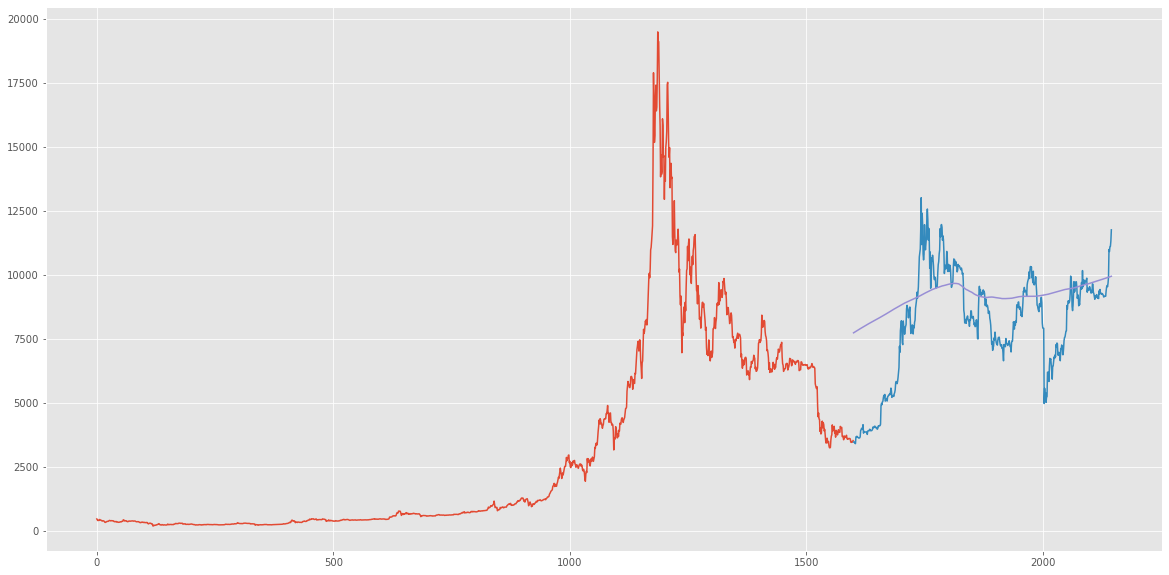

In [19]:
#test['Predictions'] = 0
test['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close', 'Predictions']])

# Simple Linear Regression

In [20]:
new_data.head()

,Date,Adj Close
0,2014-09-16 00:00:00,457.334
1,2014-09-17 00:00:00,424.44
2,2014-09-18 00:00:00,394.796
3,2014-09-19 00:00:00,408.904
4,2014-09-20 00:00:00,398.821


In [21]:
# conda install -c pytorch -c fastai fastai
# use fastai functions to generate a lot of date related columns
from fastai.tabular import *
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

D:\ProgramData\Anaconda3\envs\PythonAdv\lib\site-packages\fastai\tabular\transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [27]:
new_data.head()

,Adj Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,457.334,2014,9,38,16,1,259,False,False,False,False,False,False
1,424.44,2014,9,38,17,2,260,False,False,False,False,False,False
2,394.796,2014,9,38,18,3,261,False,False,False,False,False,False
3,408.904,2014,9,38,19,4,262,False,False,False,False,False,False
4,398.821,2014,9,38,20,5,263,False,False,False,False,False,False


In [28]:
new_data.shape

(2146, 13)

In [29]:
train = new_data[:1600]
test = new_data[1600:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_test = test.drop('Adj Close', axis=1)
y_test = test['Adj Close']

In [30]:
print(x_train.shape, y_train.shape)

(1600, 12) (1600,)


In [31]:
print(x_test.shape, y_test.shape)

(546, 12) (546,)


In [ ]:
x_train

In [ ]:
# Implementing linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
# Predictions 
preds = model.predict(x_test)
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print(rms)

In [ ]:
# Plot
test['Predictions'] = preds

plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close', 'Predictions']])

# k-Nearest Neighbours

In [32]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [33]:
# # new_data.dropna(inplace=True)
# X = new_data.drop('Adj Close', axis=1)
# y = new_data['Adj Close']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# # train = new_data[:1600]
# # test = new_data[1600:]


# x_train = train.drop('Adj Close', axis=1)
# y_train = train['Adj Close']
# x_test = test.drop('Adj Close', axis=1)
# y_test = test['Adj Close']

In [34]:
train = new_data[:1600]
test = new_data[1600:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_test = test.drop('Adj Close', axis=1)
y_test = test['Adj Close']

In [36]:
# scaling the data

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [37]:
# using gridsearch to find the best value of k

params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [39]:
x_train.shape

(1600, 12)

In [40]:
y_train.shape

(1600,)

In [41]:
print(x_train.shape, y_train.shape)

(1600, 12) (1600,)


In [42]:
print(x_test.shape, y_test.shape)

(546, 12) (546,)


In [43]:
# fitting the model and predicting
model.fit(x_train, y_train)
preds = model.predict(x_test)

In [44]:
# Results
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print(rms)

6407.940377536821


D:\ProgramData\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


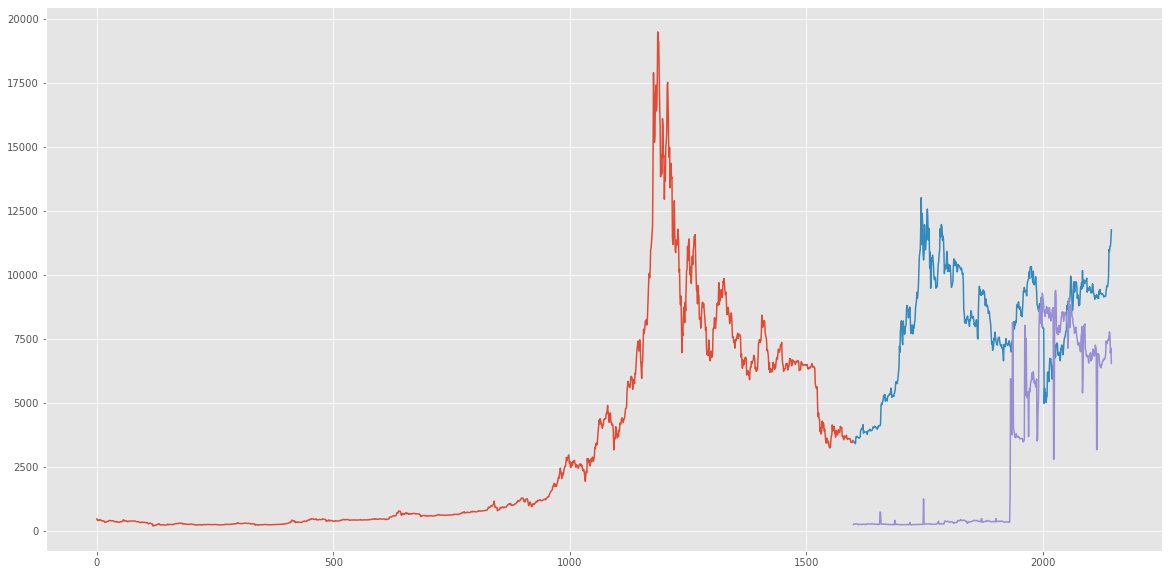

In [46]:
test['Predictions'] = preds

plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close', 'Predictions']])

# Multilayer Perceptron

In [47]:
import tensorflow as tf
from tensorflow.keras import layers

In [48]:
model = tf.keras.models.Sequential()

In [49]:
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

In [50]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [59]:
X_train = np.array(x_train).astype(np.float32)
Y_train = np.array(y_train).astype(np.float32)

In [60]:
X_train

array([[0.      , 0.727273, 0.711538, 0.5     , ..., 0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.727273, 0.711538, 0.533333, ..., 0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.727273, 0.711538, 0.566667, ..., 0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.727273, 0.711538, 0.6     , ..., 0.      , 0.      , 0.      , 0.      ],
       ...,
       [1.      , 0.      , 0.076923, 0.966667, ..., 0.      , 0.      , 0.      , 0.      ],
       [1.      , 0.      , 0.076923, 1.      , ..., 0.      , 0.      , 0.      , 0.      ],
       [1.      , 0.090909, 0.076923, 0.      , ..., 0.      , 0.      , 0.      , 0.      ],
       [1.      , 0.090909, 0.076923, 0.033333, ..., 0.      , 0.      , 0.      , 0.      ]], dtype=float32)

In [61]:
X_train.shape

(1600, 12)

In [62]:
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
50/50 [==============================] - 0s 1ms/step - loss: 22216632.0000
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 21994588.0000
Epoch 3/500
50/50 [==============================] - 0s 1ms/step - loss: 20983042.0000
Epoch 4/500
50/50 [==============================] - 0s 997us/step - loss: 18611380.0000
Epoch 5/500
50/50 [==============================] - 0s 1ms/step - loss: 15645952.0000
Epoch 6/500
50/50 [==============================] - 0s 1ms/step - loss: 13702956.0000
Epoch 7/500
50/50 [==============================] - 0s 977us/step - loss: 13046820.0000
Epoch 8/500
50/50 [==============================] - 0s 1ms/step - loss: 12859011.0000
Epoch 9/500
50/50 [==============================] - 0s 1ms/step - loss: 12702875.0000
Epoch 10/500
50/50 [==============================] - 0s 1ms/step - loss: 12553477.0000
Epoch 11/500
50/50 [==============================] - 0s 957us/step - loss: 12399493.0000
Epoch 12/500
50/50 [===============

50/50 [==============================] - 0s 1ms/step - loss: 5636086.5000
Epoch 95/500
50/50 [==============================] - 0s 1ms/step - loss: 5628866.0000
Epoch 96/500
50/50 [==============================] - 0s 1ms/step - loss: 5625826.5000
Epoch 97/500
50/50 [==============================] - 0s 1ms/step - loss: 5648102.0000
Epoch 98/500
50/50 [==============================] - 0s 997us/step - loss: 5623105.5000
Epoch 99/500
50/50 [==============================] - 0s 1ms/step - loss: 5622177.5000
Epoch 100/500
50/50 [==============================] - 0s 957us/step - loss: 5622132.0000
Epoch 101/500
50/50 [==============================] - 0s 997us/step - loss: 5599028.0000
Epoch 102/500
50/50 [==============================] - 0s 1ms/step - loss: 5594912.5000
Epoch 103/500
50/50 [==============================] - 0s 1ms/step - loss: 5611585.5000
Epoch 104/500
50/50 [==============================] - 0s 930us/step - loss: 5597787.0000
Epoch 105/500
50/50 [======================

50/50 [==============================] - 0s 1ms/step - loss: 4805404.0000
Epoch 187/500
50/50 [==============================] - 0s 1ms/step - loss: 4786005.5000
Epoch 188/500
50/50 [==============================] - 0s 918us/step - loss: 4771916.0000
Epoch 189/500
50/50 [==============================] - 0s 1ms/step - loss: 4755192.5000
Epoch 190/500
50/50 [==============================] - 0s 957us/step - loss: 4743260.5000
Epoch 191/500
50/50 [==============================] - 0s 1ms/step - loss: 4732155.0000
Epoch 192/500
50/50 [==============================] - 0s 918us/step - loss: 4717672.5000
Epoch 193/500
50/50 [==============================] - 0s 1ms/step - loss: 4707570.0000
Epoch 194/500
50/50 [==============================] - 0s 965us/step - loss: 4690110.5000
Epoch 195/500
50/50 [==============================] - 0s 997us/step - loss: 4682021.5000
Epoch 196/500
50/50 [==============================] - 0s 908us/step - loss: 4680249.5000
Epoch 197/500
50/50 [=============

50/50 [==============================] - 0s 1ms/step - loss: 3623988.2500
Epoch 279/500
50/50 [==============================] - 0s 1ms/step - loss: 3605958.0000
Epoch 280/500
50/50 [==============================] - 0s 938us/step - loss: 3602926.7500
Epoch 281/500
50/50 [==============================] - 0s 957us/step - loss: 3581770.0000
Epoch 282/500
50/50 [==============================] - 0s 1ms/step - loss: 3569459.7500
Epoch 283/500
50/50 [==============================] - 0s 977us/step - loss: 3549630.0000
Epoch 284/500
50/50 [==============================] - 0s 997us/step - loss: 3534086.7500
Epoch 285/500
50/50 [==============================] - 0s 918us/step - loss: 3523294.5000
Epoch 286/500
50/50 [==============================] - 0s 977us/step - loss: 3501274.5000
Epoch 287/500
50/50 [==============================] - 0s 997us/step - loss: 3497663.0000
Epoch 288/500
50/50 [==============================] - 0s 1ms/step - loss: 3477165.5000
Epoch 289/500
50/50 [===========

50/50 [==============================] - 0s 937us/step - loss: 2077841.5000
Epoch 371/500
50/50 [==============================] - 0s 1ms/step - loss: 2047380.7500
Epoch 372/500
50/50 [==============================] - 0s 957us/step - loss: 2026138.3750
Epoch 373/500
50/50 [==============================] - 0s 1ms/step - loss: 2008419.3750
Epoch 374/500
50/50 [==============================] - 0s 997us/step - loss: 1996487.5000
Epoch 375/500
50/50 [==============================] - 0s 977us/step - loss: 1980993.1250
Epoch 376/500
50/50 [==============================] - 0s 1ms/step - loss: 1971396.1250
Epoch 377/500
50/50 [==============================] - 0s 999us/step - loss: 1955476.1250
Epoch 378/500
50/50 [==============================] - 0s 977us/step - loss: 1943903.3750
Epoch 379/500
50/50 [==============================] - 0s 938us/step - loss: 1948875.3750
Epoch 380/500
50/50 [==============================] - 0s 1ms/step - loss: 1902353.1250
Epoch 381/500
50/50 [===========

50/50 [==============================] - 0s 1ms/step - loss: 1230039.0000
Epoch 462/500
50/50 [==============================] - 0s 1ms/step - loss: 1223563.5000
Epoch 463/500
50/50 [==============================] - 0s 944us/step - loss: 1219019.6250
Epoch 464/500
50/50 [==============================] - 0s 1ms/step - loss: 1225577.8750
Epoch 465/500
50/50 [==============================] - 0s 997us/step - loss: 1220786.0000
Epoch 466/500
50/50 [==============================] - 0s 1ms/step - loss: 1219256.5000
Epoch 467/500
50/50 [==============================] - 0s 1ms/step - loss: 1248652.3750
Epoch 468/500
50/50 [==============================] - 0s 1ms/step - loss: 1211341.6250
Epoch 469/500
50/50 [==============================] - 0s 1ms/step - loss: 1218222.3750
Epoch 470/500
50/50 [==============================] - 0s 1ms/step - loss: 1221041.0000
Epoch 471/500
50/50 [==============================] - 0s 997us/step - loss: 1198338.5000
Epoch 472/500
50/50 [===================

In [63]:
preds = model.predict(x_test)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [64]:
# Results
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print(rms)

7688.163514434418


D:\ProgramData\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


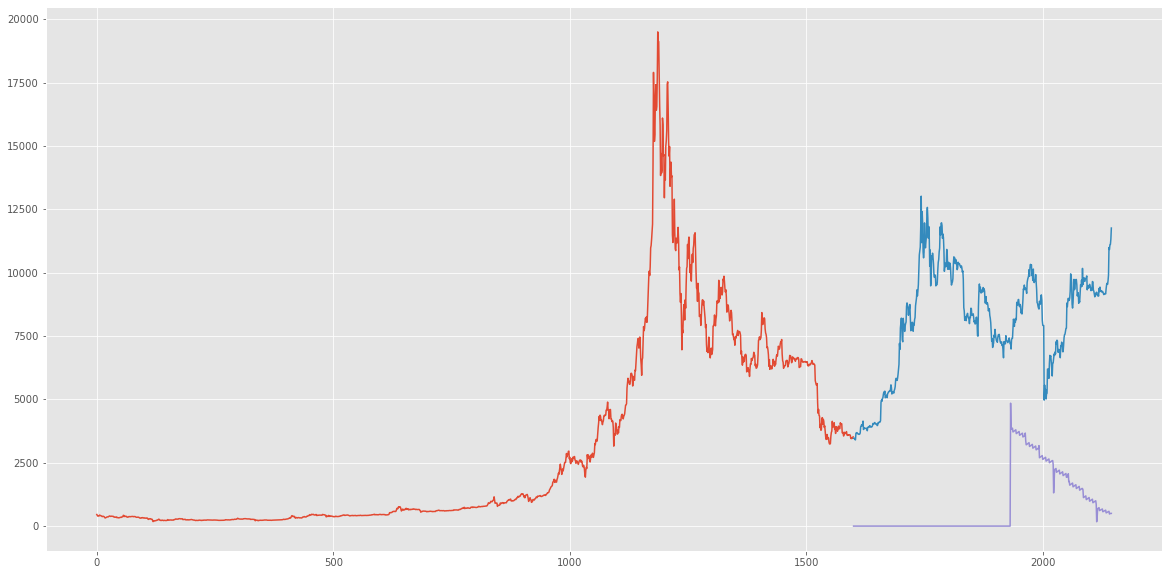

In [65]:
test['Predictions'] = 0
test['Predictions'] = preds

plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close', 'Predictions']])